In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

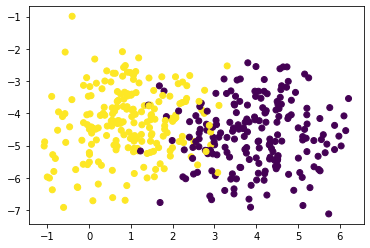

In [ ]:
X, y = make_blobs(n_samples=500, n_features=2, centers=2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=46)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
from sklearn.metrics import classification_report

y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95        54
           1       0.95      0.91      0.93        46

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100



In [ ]:
from sklearn.naive_bayes import GaussianNB #data numerik

nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = nb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        54
           1       1.00      0.96      0.98        46

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



### implementation on titanic dataset

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/afifai/pelatihan_machinelearning/master/data/train.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

In [ ]:
df.set_index('PassengerId', inplace=True)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
1,0,3,male,22.0,1,0,7.2500
2,1,1,female,38.0,1,0,71.2833
3,1,3,female,26.0,0,0,7.9250
4,1,1,female,35.0,1,0,53.1000
5,0,3,male,35.0,0,0,8.0500


In [ ]:
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=46)

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
X_train.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [ ]:
num_values = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
cat_values = ['Sex']

In [ ]:
#pisahin
X_train_num = X_train[num_values]
X_train_cat = X_train[cat_values]
X_test_num = X_test[num_values]
X_test_cat = X_test[cat_values]

In [ ]:
#imputasi(numerik)
imputer = SimpleImputer(strategy='median')
imputer.fit(X_train_num)

#median yang diimput ke test, median punya train
X_train_num_prep = imputer.transform(X_train_num)
X_test_num_prep = imputer.transform(X_test_num)

In [ ]:
#scaling (numerik)
scaler = StandardScaler()
scaler.fit(X_train_num_prep)

X_train_num_prep = scaler.transform(X_train_num_prep)
X_test_num_prep = scaler.transform(X_test_num_prep)

In [ ]:
#encode (kategorikal)
le = LabelEncoder()
le.fit(X_train_cat)

X_train_cat_prep = le.transform(X_train_cat)
X_test_cat_prep = le.transform(X_test_cat)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
import numpy as np
X_train_all = np.column_stack([X_train_num_prep, X_train_cat_prep])
X_test_all = np.column_stack([X_test_num_prep, X_test_cat_prep])

In [ ]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train_all, y_train)

y_pred = model.predict(X_test_all)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       129
           1       0.83      0.77      0.80        94

    accuracy                           0.83       223
   macro avg       0.83      0.82      0.83       223
weighted avg       0.83      0.83      0.83       223



In [ ]:
from sklearn.metrics import plot_roc_curve, roc_auc_score

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


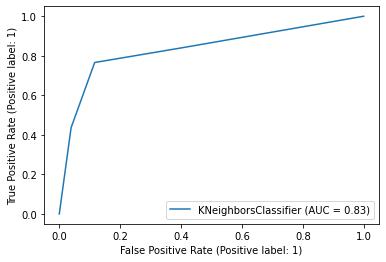

In [ ]:
plot_roc_curve(model, X_test_all, y_test)

In [ ]:
y_score = model.predict_proba(X_test_all)
roc_auc_score(y_test, y_score[:,1])

0.8346940458518886